# Exploratory Data Analysis(EDA)

We Use EDA to get the basic understanding of the data set i.e we explore the data.<br>

First thing we do after getting the data set is EDA.<br>


## Iris Flower DataSet

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
# *  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



The four features of these 3 types of flowers<br>(Iris setosa, Iris versicolor, Iris virginica) are:<br>

1)Sepal Length<br>
2)Sepal Width<br>
3)Petal Length<br>
4)petal Width<br>

We will classify the given flower by using this Four Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('iris.csv');

In [3]:
# Q) How many data points and Features in dataset?
iris.shape

(150, 5)

observation: 150 rows/data points and 5 cols/features

In [4]:
#cols present in dataset

iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
#Q) how many datapts for each type of flower?

#types = iris.groupby('species');
#types.count()

#or

iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

Observation: its a balanced data set

# 2-D ScatterPlot

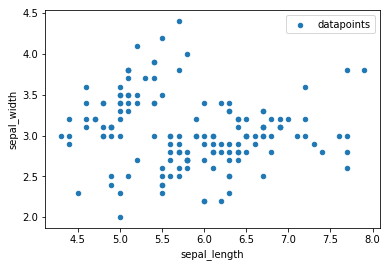

In [7]:
# label, color are optional parameters
iris.plot(x='sepal_length',y='sepal_width',kind='scatter',label='datapoints');
plt.show()

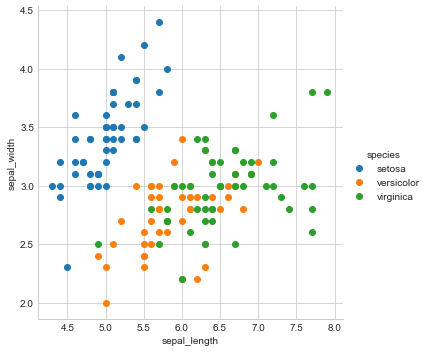

In [8]:
# using seaborn lib to stylize the graph
# sns is seaborn as imported above
sns.set_style("whitegrid");

# hue = 'species' -> color encoding based on 
# distinct species here 3 types so 3 colors

#size -> size of the graph
sns.FacetGrid(iris, hue='species',size=5) \
    .map(plt.scatter, 'sepal_length','sepal_width') \
    .add_legend();
plt.show();

Obeservation:<br>
1)Setosa Flowers can be distinguished from this as they dont overlap with other types of flowers.<br>

2)Versicolor and and Virginica flowers cant be distinguished with this features(sepal lenght and width) as they overlapped.<br>

If we draw a line we can classify setosa from these 3 types as they lie left side of the line.

# 3-D Scatter Plots

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?
Ans) as Human can visualize only 3d.
n-D can be visualized through Maths oe of the way is 'Pair-Plot'

## Pair Plots

As we cant visualize N-D we will divide features into all possible pairs and visualize the plot of pairs gives the total idea of the data.<br>

In Our Case We have 4 features:<br>

1)SL - sepal length<br>
2)SW - sepal width<br>
3)PL - petal length<br>
4)PW - petal width<br>

No.of pair plots with these 4 features is: 4C2<br> i.e 6 <br>

(SL,SW),(SL,PL),(PL,SW).....

Note: We use Seaborn Lib to PairPlot


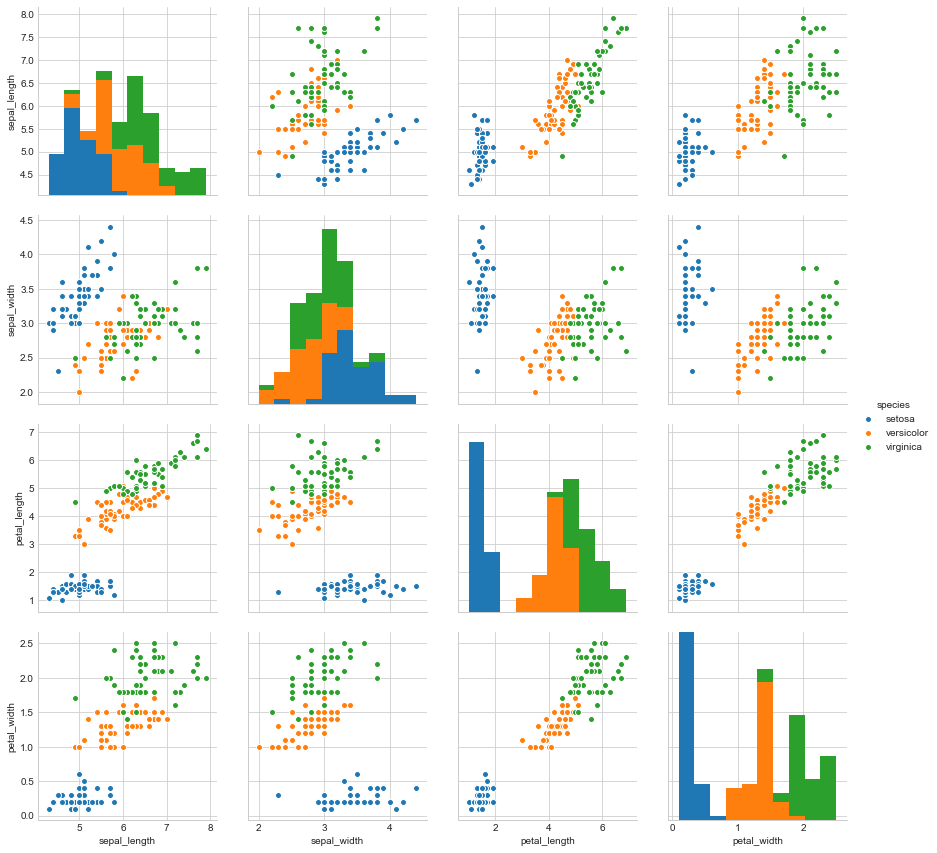

In [9]:
sns.set_style("whitegrid");
sns.pairplot(iris,hue='species',size=3);
plt.show()

Observation: From the above graphs PW-PL graph is perfect to distinguish between 3 flowers with some compramise, below is the final graph to look clearly

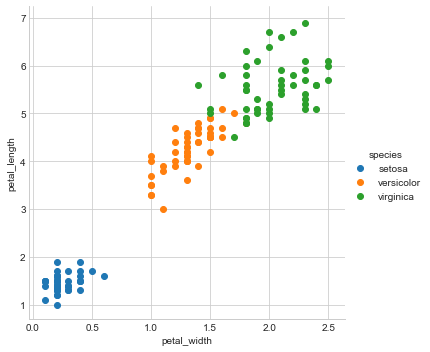

In [10]:
sns.set_style("whitegrid");

# hue = 'species' -> color encoding based on 
# distinct species here 3 types so 3 colors

#size -> size of the graph
sns.FacetGrid(iris, hue='species',size=5) \
    .map(plt.scatter, 'petal_width','petal_length') \
    .add_legend();
plt.show();

### Disadvantage of Pair Plot

Here in the above case for 4d or 4 features we have 6 plots, Consider 100d or 100 features no of plots will be 100C2 plots.

# Visualizing Covariance Matrix

In [13]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


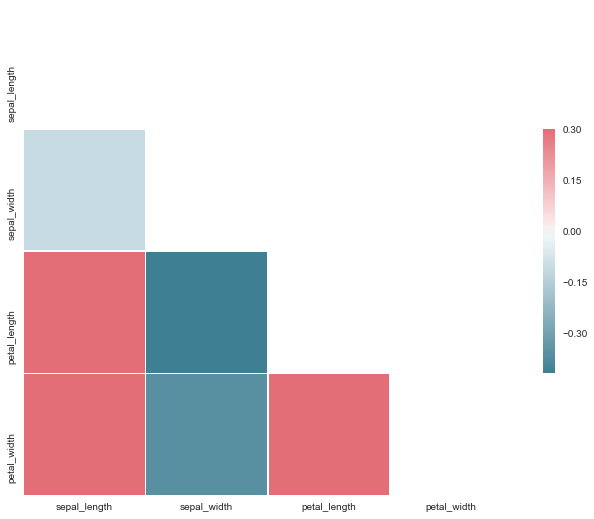

In [14]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = iris.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

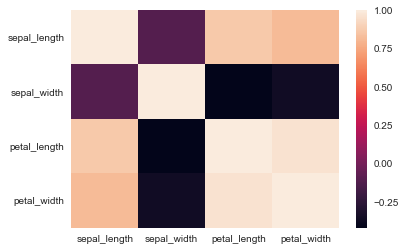

In [16]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = iris.corr()
ax = sns.heatmap(uniform_data)